## Documentation Figures

This notebook generates the figures that are used in the package documentation.

In [1]:
%matplotlib widget

import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import skimage

from usaugment.albumentations import (
    DepthAttenuation,
    GaussianShadow,
    HazeArtifact,
    SpeckleReduction,
)

IMAGE_PATH = "byra2018_liver_ultrasound.png"
SCAN_MASK_PATH = "byra2018_liver_ultrasound_mask.png"

image = skimage.io.imread(IMAGE_PATH) / 255.0
image = np.stack([image, image, image], axis=-1)
scan_mask = skimage.io.imread(SCAN_MASK_PATH)

/Users/adamt/.pyenv/versions/usaugment-dev/lib/python3.11/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.23). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


## README Banner

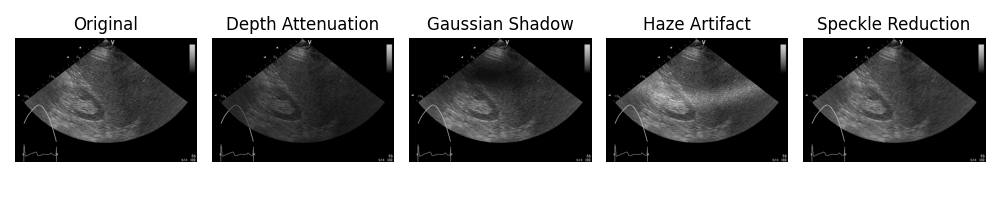

In [2]:
np.random.seed(3)

augmentations = [
    ("Original", A.NoOp(p=1.0)),
    ("Depth Attenuation", DepthAttenuation(p=1.0, attenuation_rate=1.0)),
    ("Gaussian Shadow", GaussianShadow(p=1.0, strength=0.8, sigma_x=0.2, sigma_y=0.1)),
    ("Haze Artifact", HazeArtifact(p=1.0, radius=0.5, sigma=0.05)),
    ("Speckle Reduction", SpeckleReduction(p=1.0)),
]

fig, axes = plt.subplots(1, 5, sharey=True, figsize=(10, 2))
for augmentation, ax in zip(augmentations, axes.flat):
    augmented_image = augmentation[1].apply(img=image, scan_mask=scan_mask)
    ax.set_title(augmentation[0])
    ax.imshow(
        augmented_image,
        cmap="gray",
        vmin=0,
        vmax=1,
    )
    ax.axis("off")

plt.tight_layout()
plt.savefig("../figures/readme_banner.png")
plt.show()

## Depth Attenuation Example

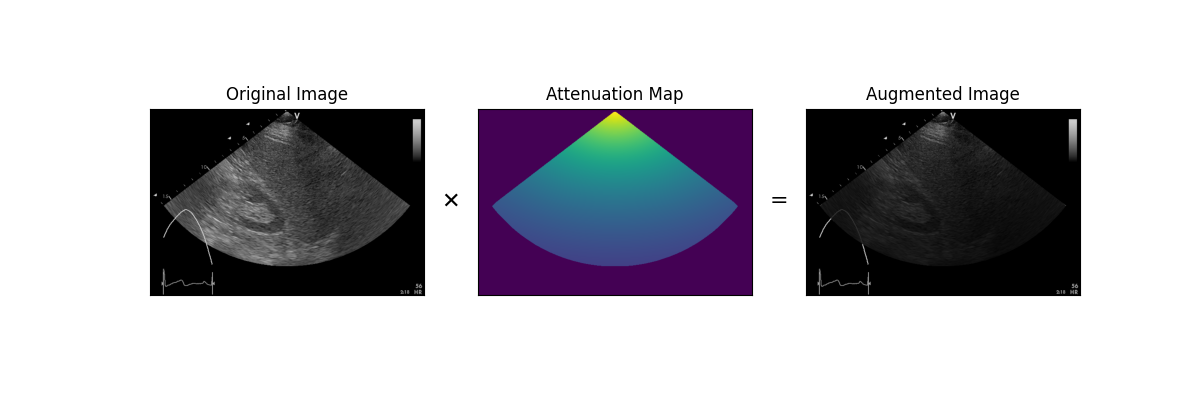

In [3]:
attenuation_rate = 2.0
max_attenuation = 0.0
augmentation = DepthAttenuation(
    attenuation_rate=attenuation_rate, max_attenuation=max_attenuation, p=1.0
)

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

axes[0].set_title("Original Image")
axes[0].imshow(image, cmap="gray", vmin=0, vmax=1)

axes[1].set_title("Attenuation Map")
axes[1].set_ylabel("✕", rotation=0, labelpad=0, fontsize=16)
axes[1].yaxis.set_label_coords(-0.1, 0.45)
axes[1].imshow(
    augmentation._generate_attenuation_map(*image.shape[:2], scan_mask=scan_mask)
)

axes[2].set_title("Augmented Image")
axes[2].set_ylabel("=", rotation=0, labelpad=0, fontsize=16)
axes[2].yaxis.set_label_coords(-0.1, 0.45)
axes[2].imshow(augmentation.apply(img=image, scan_mask=scan_mask))

for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig("../figures/depth_attenuation.png", bbox_inches="tight")
plt.show()

## Haze Artifact Example

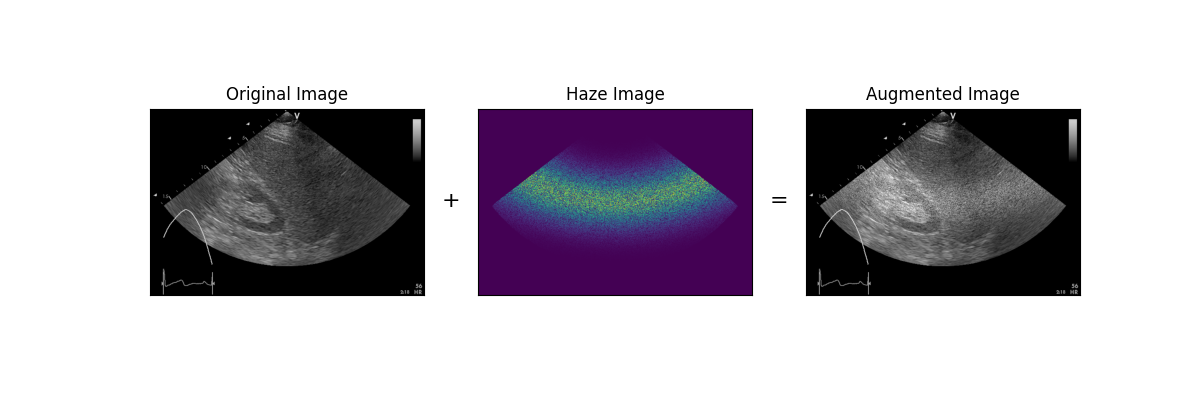

In [4]:
radius = 0.5
sigma = 0.1
augmentation = HazeArtifact(radius=radius, sigma=sigma, p=1.0)

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

axes[0].set_title("Original Image")
axes[0].imshow(image, cmap="gray", vmin=0, vmax=1)

axes[1].set_title("Haze Image")
axes[1].set_ylabel("+", rotation=0, labelpad=0, fontsize=16)
axes[1].yaxis.set_label_coords(-0.1, 0.45)
haze_image = augmentation._generate_haze(*image.shape[:2])
haze_image = haze_image * scan_mask
axes[1].imshow(haze_image)

axes[2].set_title("Augmented Image")
axes[2].set_ylabel("=", rotation=0, labelpad=0, fontsize=16)
axes[2].yaxis.set_label_coords(-0.1, 0.45)
axes[2].imshow(augmentation.apply(img=image, scan_mask=scan_mask))

for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig("../figures/haze_artifact.png", bbox_inches="tight")
plt.show()

## Gaussian Shadow Example

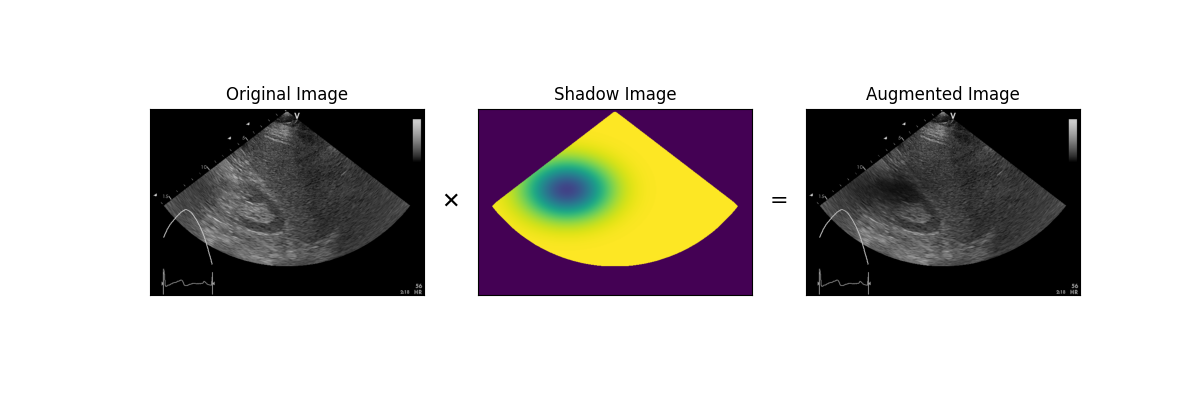

In [5]:
seed = 5
strength = 0.8
sigma_x = 0.1
sigma_y = 0.1
augmentation = GaussianShadow(
    strength=strength, sigma_x=sigma_x, sigma_y=sigma_y, p=1.0
)
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

axes[0].set_title("Original Image")
axes[0].imshow(image, cmap="gray", vmin=0, vmax=1)

axes[1].set_title("Shadow Image")
axes[1].set_ylabel("✕", rotation=0, labelpad=0, fontsize=16)
axes[1].yaxis.set_label_coords(-0.1, 0.45)
np.random.seed(seed)
shadow_image = augmentation._generate_shadow_image(
    image.shape[0], image.shape[1], scan_mask=scan_mask
)
axes[1].imshow(shadow_image)

axes[2].set_title("Augmented Image")
axes[2].set_ylabel("=", rotation=0, labelpad=0, fontsize=16)
axes[2].yaxis.set_label_coords(-0.1, 0.45)
np.random.seed(seed)
augmented_image = augmentation.apply(img=image, scan_mask=scan_mask)
axes[2].imshow(augmented_image)

for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig("../figures/gaussian_shadow.png", bbox_inches="tight")
plt.show()

## Speckle Reduction Example

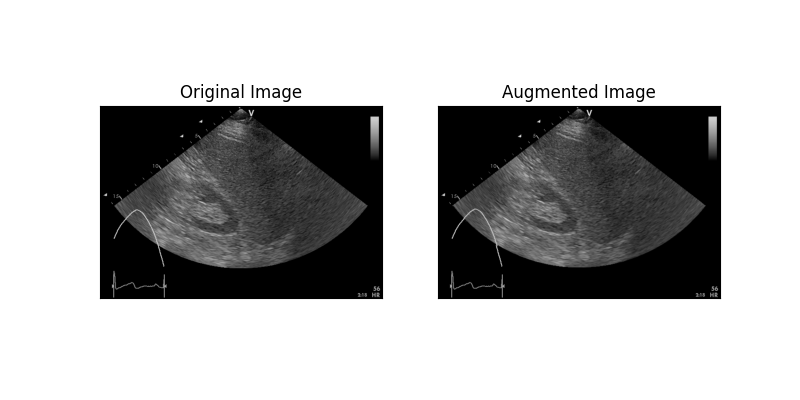

In [6]:
sigma_spatial = 0.5
sigma_color = 0.5
augmentation = SpeckleReduction(
    sigma_spatial=sigma_spatial, sigma_color=sigma_color, window_size=5, p=1.0
)

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 4))

axes[0].set_title("Original Image")
axes[0].imshow(image, cmap="gray", vmin=0, vmax=1)

axes[1].set_title("Augmented Image")
augmented_image = augmentation.apply(img=image, scan_mask=scan_mask)
axes[1].imshow(augmented_image)

for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig("../figures/speckle_reduction.png", bbox_inches="tight")
plt.show()